In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Training Text (Sequence)
# Learn the pattern in the word: "martand"
# The model will try to predict the next character

data = "sayali"

# Character set and mappings
chars = sorted(list(set(data)))
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for ch, i in char_to_idx.items()}

# One-hot encoding
def one_hot(i, size):
    v = np.zeros(size)
    v[i] = 1
    return v

In [3]:
# 2. Activation Functions

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [4]:
# 3. Initialize RNN Parameters

input_size = output_size = len(chars)   # number of unique characters
hidden_size = 32                        # hidden neurons
lr = 0.05                               # learning rate

np.random.seed(0)

# Weight matrices
W_xh = np.random.randn(hidden_size, input_size) * 0.1   # input → hidden
W_hh = np.random.randn(hidden_size, hidden_size) * 0.1  # hidden → hidden
W_hy = np.random.randn(output_size, hidden_size) * 0.1  # hidden → output

# Bias vectors
b_h = np.zeros((hidden_size, 1))
b_y = np.zeros((output_size, 1))

# To store loss for plotting
losses = []


In [5]:
# 4. Training Loop
# ============================================================
print("Training RNN on text:", data)

for epoch in range(500):
    h = np.zeros((hidden_size, 1))  # initial hidden state
    loss = 0

    # Loop through each character in the sequence
    for t in range(len(data) - 1):
        # Input character (one-hot)
        x = one_hot(char_to_idx[data[t]], input_size).reshape(-1, 1)
        # True next character
        y_true = one_hot(char_to_idx[data[t + 1]], output_size).reshape(-1, 1)

        # ---------- Forward Pass ----------
        h = sigmoid(np.dot(W_xh, x) + np.dot(W_hh, h) + b_h)
        y_raw = np.dot(W_hy, h) + b_y

        # Softmax for probabilities
        p = np.exp(y_raw) / np.sum(np.exp(y_raw))

        # Cross-entropy loss
        loss -= np.sum(y_true * np.log(p + 1e-9))

        # ---------- Backpropagation ----------
        dy = p - y_true

        # Gradients for output layer
        dW_hy = np.dot(dy, h.T)
        db_y = dy

        # Backprop into hidden layer
        dh = np.dot(W_hy.T, dy) * sigmoid_derivative(h)

        # Gradients for hidden layer weights
        dW_xh = np.dot(dh, x.T)
        dW_hh = np.dot(dh, h.T)
        db_h = dh

        # ---------- Update Weights ----------
        W_hy -= lr * dW_hy
        b_y -= lr * db_y
        W_xh -= lr * dW_xh
        W_hh -= lr * dW_hh
        b_h -= lr * db_h

    losses.append(loss)

    # Print training progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Training RNN on text: sayali
Epoch 0, Loss: 8.4312
Epoch 100, Loss: 4.9808
Epoch 200, Loss: 2.5614
Epoch 300, Loss: 1.9608
Epoch 400, Loss: 1.7862


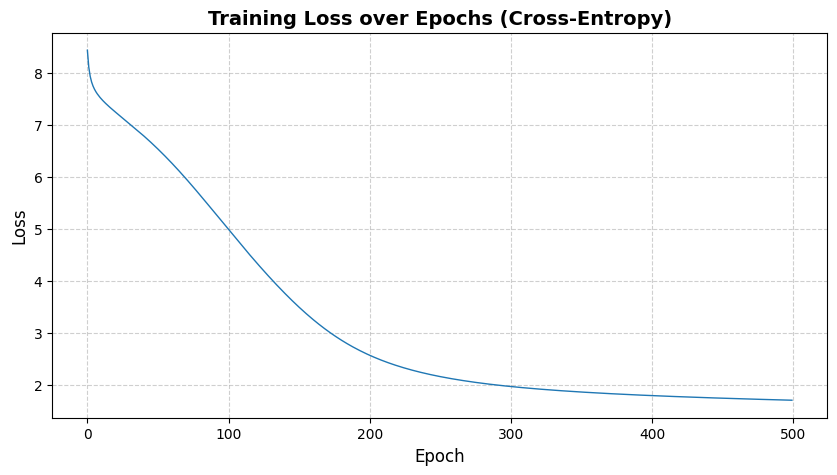

In [6]:
# 5. Plot Training Loss Curve
# ============================================================
plt.figure(figsize=(10, 5))
plt.plot(losses, linewidth=1.0)
plt.title("Training Loss over Epochs (Cross-Entropy)", fontsize=14, weight='bold')
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [7]:
# 6. Prediction Phase
# Predict next character based on input
# ============================================================

print("\nModel is trained! Try predicting the next letter.\n")

while True:
    ch = input("Enter a letter: ").lower().strip()

    if ch not in char_to_idx:
        print("Character not in training data. Try again!")
        continue

    # Reset hidden state for prediction
    h = np.zeros((hidden_size, 1))
    x = one_hot(char_to_idx[ch], input_size).reshape(-1, 1)

    # Forward pass for prediction
    h = sigmoid(np.dot(W_xh, x) + np.dot(W_hh, h) + b_h)
    y_raw = np.dot(W_hy, h) + b_y
    p = np.exp(y_raw) / np.sum(np.exp(y_raw))

    # Pick the most likely next character
    next_idx = np.argmax(p)
    print("Predicted next letter:", idx_to_char[next_idx])


Model is trained! Try predicting the next letter.



Enter a letter:  s


Predicted next letter: a


Enter a letter:  m


Character not in training data. Try again!


Enter a letter:  y


Predicted next letter: a


Enter a letter:  l


Predicted next letter: i


KeyboardInterrupt: Interrupted by user